<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





# Analyzing PBMCs Single Cell ATAC- Seq (scATAC-Seq) and Multiome data: Theory and practice

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 11 November 2024
- **Course duration**: 5 hours

**Speakers:**

- <font color='orange'>Diego Ramirez</font> - Bachelor in Genomic Sciences, Escuela Nacional de Estudios Superiores Unidad Juriquilla UNAM (ENES Juriquilla), Mexico.
- <font color='orange'>Evelia Lorena Coss-Navarrete</font> - PostDoc, International Laboratory for Human Genome Research (LIIGH)-UNAM, Mexico. Contact: [Web page](https://eveliacoss.github.io/)

### About datasets



# 2️⃣ Practical 14: Downstream analysis for scATAC-seq

## Settings 💻 <a name="setup"></a>

In [ ]:
start_time <- Sys.time()
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

cranPkgs <- c("BiocManager", "Seurat", "cowplot", "SingleCellExperiment", "scDblFinder", "Rtsne", "hdf5r", "clustree",
              "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "patchwork", "ggplot2", "future")
biocPkgs <- c("celldex", "SingleR", "SeuratDisk", "clusterProfile", "preprocessCore", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
              "biovizBase", "LoomExperiment", "SingleCellExperiment", "JASPAR2020", "TFBSTools", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db"
              , "BSgenome.Hsapiens.UCSC.hg38", "")

# Install packages from CRAN
install.packages(cranPkgs, ask=FALSE, update=TRUE, quietly=TRUE)

# Install packages from Bioconductor
if (!requireNamespace("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}
BiocManager::install(biocPkgs)

# Install SeuratData and sceasy from GitHub
if (!requireNamespace("devtools", quietly = TRUE)) {
    install.packages("devtools")
}

devtools::install_github('satijalab/seurat-data')
devtools::install_github("cellgeni/sceasy")

# Verify and install SeuratData from Bioconductor if necessary
if (!requireNamespace("SeuratData", quietly = TRUE)) {
    BiocManager::install("SeuratData")
}

#Install presto
if (!requireNamespace("remotes", quietly = TRUE))
  install.packages('remotes')
remotes::install_github('immunogenomics/presto')

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

pkgs = c("Rtsne", "Seurat", "SingleCellExperiment", "scDblFinder", "tidyverse", "future",
         "cowplot", "preprocessCore", "SingleR", "clusterProfile", "celldex", "SeuratDisk", "pheatmap", "patchwork", "ggplot2",
         "hdf5r", "clustree", "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
         "biovizBase", "LoomExperiment", "SingleCellExperiment", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db",
         "BSgenome.Hsapiens.UCSC.hg38", "presto")
# Load the packages
loadPackages(pkgs)

loaded_packages <- sessionInfo()$otherPkgs
names(loaded_packages)

cat("Versión de R:", R.version$version.string, "\n")
cat("Numero de cores:", availableCores(), "\n")
packageVersion("Signac")
plan("multicore", workers = 2)
plan()
options(future.globals.maxSize = 10 * 1024^3)

53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No4ET1MzIuDAHwl0J+mbWKPH4tIosYkcVmv

Tracing function "install.packages" in package "utils"

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'celldex' 'SingleR' 'preprocessCore'
  'EnsDb.Hsapiens.v86' 'EnsDb.Hsapiens.v75' 'biovizBase' 'LoomExperiment'
  'SingleCellExperiment' 'JASPAR2020' 'TFBSTools' 'glmGamPoi' 'clusterProfiler'
  'org.Hs.eg.db' 'BSgenome.Hsapiens.UCSC.hg38'"
Installing package(s) 'SeuratDisk', 'clusterProfile'

Warning message:
"packages 'SeuratDisk', 'clusterProfile' are not available for Bioconductor version '3.19'

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-adm

[1] "curl"                        "httr"                       
 [3] "presto"                      "data.table"                 
 [5] "Rcpp"                        "BSgenome.Hsapiens.UCSC.hg38"
 [7] "BSgenome"                    "rtracklayer"                
 [9] "Biostrings"                  "XVector"                    
[11] "org.Hs.eg.db"                "clusterProfiler"            
[13] "glmGamPoi"                   "LoomExperiment"             
[15] "BiocIO"                      "rhdf5"                      
[17] "biovizBase"                  "EnsDb.Hsapiens.v75"         
[19] "EnsDb.Hsapiens.v86"          "ensembldb"                  
[21] "AnnotationFilter"            "GenomicFeatures"            
[23] "AnnotationDbi"               "reticulate"                 
[25] "Signac"                      "clustree"                   
[27] "ggraph"                      "hdf5r"                      
[29] "patchwork"                   "pheatmap"                   
[31] "celldex"                     "SingleR"                    
[33] "preprocessCore"              "cowplot"                    
[35] "future"                      "lubridate"                  
[37] "forcats"                     "stringr"                    
[39] "dplyr"                       "purrr"                      
[41] "readr"                       "tidyr"                      
[43] "tibble"                      "ggplot2"                    
[45] "tidyverse"                   "scDblFinder"                
[47] "SingleCellExperiment"        "SummarizedExperiment"       
[49] "Biobase"                     "GenomicRanges"              
[51] "GenomeInfoDb"                "IRanges"                    
[53] "S4Vectors"                   "BiocGenerics"               
[55] "MatrixGenerics"              "matrixStats"                
[57] "Seurat"                      "SeuratObject"               
[59] "sp"                          "Rtsne"

Versión de R: R version 4.4.1 (2024-06-14) 
Numero de cores: 2 


[1] '1.14.0'

multicore:
- args: function (..., workers = 2, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 2)

## Download and Load data

For this tutorial, we will use the results from Practical 13, where we analyzed a single-cell ATAC-seq dataset of [human peripheral blood mononuclear cells (PBMCs)](https://www.10xgenomics.com/datasets/1-k-peripheral-blood-mononuclear-cells-pbm-cs-from-a-healthy-donor-next-gem-v-1-1-1-1-standard-1-1-0). Additionally, we will use the pre-processed Seurat object available here.

**STEP 1:** Download the file previously generated in the previous practice (Practical 13). If you did not download it ("pbmc.RData") then download it by clicking [here](https://drive.google.com/file/d/11SUSYlnfxrGj8qJjhVoo8ZnA2_keuvfI/view?usp=sharing) and upload the file to google colab.

In [ ]:
load("pbmc.RData")

**STEP 2:** Download fragment files and fragment file index from  [human peripheral blood mononuclear cells (PBMCs)](https://www.10xgenomics.com/datasets/1-k-peripheral-blood-mononuclear-cells-pbm-cs-from-a-healthy-donor-next-gem-v-1-1-1-1-standard-1-1-0).

In [ ]:
# Download
# Fragment file
system("wget https://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_pbmc_1k_nextgem/atac_pbmc_1k_nextgem_fragments.tsv.gz")
# Fragment file index
system("wget https://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_pbmc_1k_nextgem/atac_pbmc_1k_nextgem_fragments.tsv.gz.tbi")

## Create a gene activity matrix

In [ ]:
set.seed(1234)

To create a gene activity matrix, we extract gene coordinates and extend them to include the 2 kb upstream region (as promoter accessibility is often correlated with gene expression). We then count the number of fragments for each cell that map to each of these regions, using the using the `FeatureMatrix()` function. These steps are automatically performed by the `GeneActivity()` function:

In [ ]:
gene.activities <- GeneActivity(pbmc)

Extracting gene coordinates

Warning message in SingleFeatureMatrix(fragment = fragments[[x]], features = features, :
"13 features are on seqnames not present in the fragment file. These will be removed."
Extracting reads overlapping genomic regions



In [ ]:
# add the gene activity matrix to the Seurat object as a new assay and normalize it
pbmc[['RNA']] <- CreateAssayObject(counts = gene.activities)
pbmc <- NormalizeData(
  object = pbmc,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(pbmc$nCount_RNA)
)

In [ ]:
rm(gene.activities)

Now we can visualize the activities of canonical marker genes to help interpret our ATAC-seq clusters. Note that the activities will be much noisier than scRNA-seq measurements. This is because they represent measurements from sparse chromatin data, and because they assume a general correspondence between gene body/promoter accessibility and gene expression which may not always be the case. Nonetheless, we can begin to discern populations of monocytes, B, T, and NK cells based on these gene activity profiles. However, further subdivision of these cell types is challenging based on supervised analysis alone.

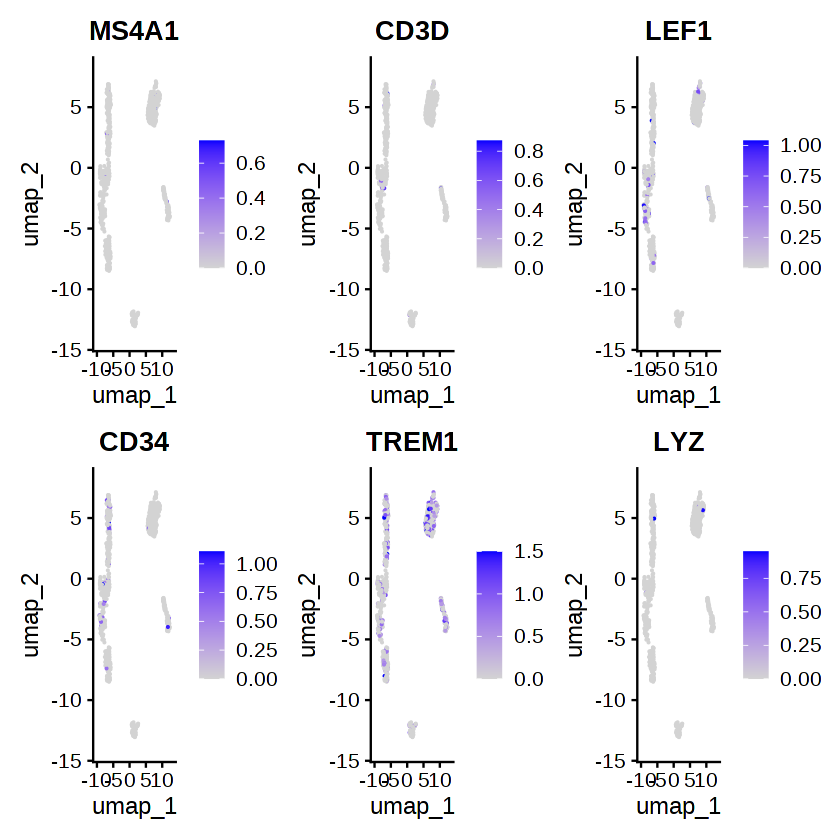

In [ ]:
DefaultAssay(pbmc) <- 'RNA'

plot1 <- FeaturePlot(
  object = pbmc,
  features = c('MS4A1', 'CD3D', 'LEF1', 'CD34', 'TREM1', 'LYZ'),
  pt.size = 0.1,
  max.cutoff = 'q95',
  ncol = 3
)

plot1

### Integrate with scRNA-seq
To help interpret the scATAC-seq data, we can classify cells based on an scRNA-seq experiment from the same biological system (human PBMC). We utilize methods for cross-modality integration and label transfer. We aim to identify shared correlation patterns in the gene activity matrix and scRNA-seq dataset to identify matched biological states across the two modalities. This procedure returns a classification score for each cell for each scRNA-seq-defined cluster label.

In [ ]:
system("wget https://signac-objects.s3.amazonaws.com/pbmc_10k_v3.rds")

In [ ]:
# Load the pre-processed scRNA-seq data for PBMCs
pbmc_rna <- readRDS("pbmc_10k_v3.rds")
pbmc_rna <- UpdateSeuratObject(pbmc_rna)
# free memory
gc()

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc 'pca'

Updating matrix keys for DimReduc 'tsne'

Updating matrix keys for DimReduc 'umap'

Warning message:
"Assay RNA changing from Assay to Assay"
Warning message:
"Graph RNA_nn changing from Graph to Graph"
Warning message:
"Graph RNA_snn changing from Graph to Graph"
Warning message:
"DimReduc pca changing from DimReduc to DimReduc"
Warning message:
"DimReduc tsne changing from DimReduc to DimReduc"
Warning message:
"DimReduc umap changing from DimReduc to DimReduc"
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in tsne

Setting tsne DimReduc to global

Updating slots in umap

Setting umap DimReduc to global

Set

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,17748959,947.9,26569360,1419.0,26569360,1419.0
Vcells,172548260,1316.5,293702368,2240.8,235938666,1800.1


In [ ]:
system("rm pbmc_10k_v3.rds")

### Find Transfer Anchors
Find a set of anchors between a reference and query object. These anchors can later be used to transfer data from the reference to query object using the TransferData function.

In [ ]:
transfer.anchors <- FindTransferAnchors(
  reference = pbmc_rna, # scRNA
  query = pbmc, # scATAC
  reduction = 'cca' # Perform dimensional reduction
)

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4161 anchors



### Annotate scATAC-seq via label transfer
After identifying anchors, we can transfer annotations from the scRNA-seq dataset into the scATAC-seq cells. The annotations are stored in the seurat_annotations field, and are provided as input to the refdata parameter. The output will contain a matrix with predictions and confidence scores for each ATAC-seq cell.

In [ ]:
predicted.labels <- TransferData(
  anchorset = transfer.anchors,
  refdata = pbmc_rna$celltype,
  weight.reduction = pbmc[['lsi']], # reduction of the original seurat object's dim
  dims = 2:30
)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [ ]:
pbmc <- AddMetaData(object = pbmc, metadata = predicted.labels)
gc()# free memory

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,17842310,952.9,26569360,1419.0,26569360,1419.0
Vcells,228290153,1741.8,507808890,3874.3,423106873,3228.1


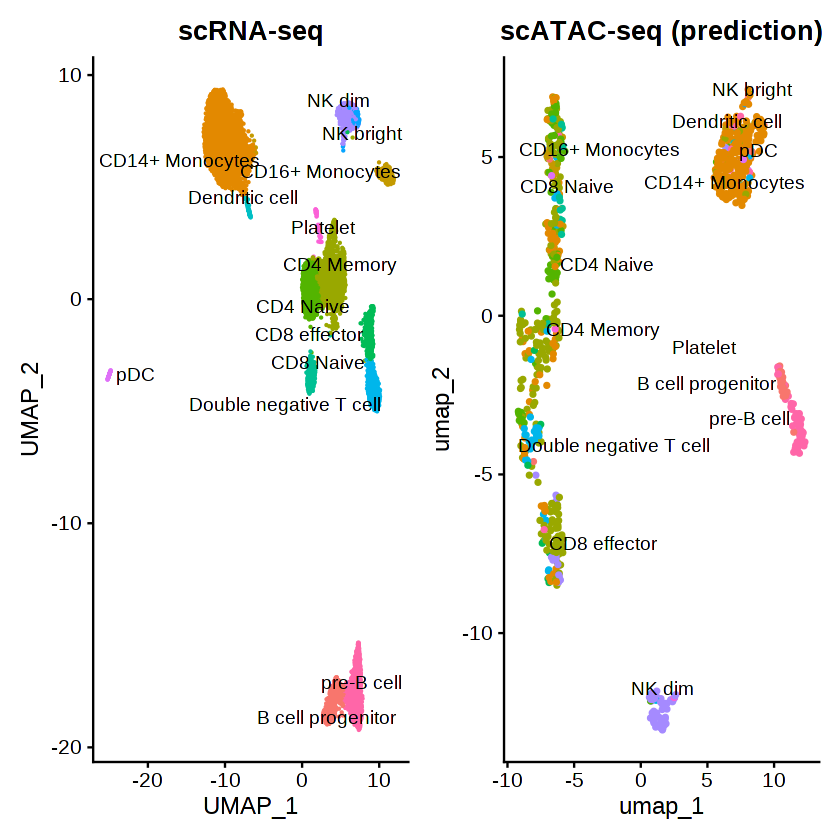

In [ ]:
plot1 <- DimPlot(
  object = pbmc_rna,
  group.by = 'celltype',
  label = TRUE,
  repel = TRUE) + NoLegend() + ggtitle('scRNA-seq')

plot2 <- DimPlot(
  object = pbmc,
  group.by = 'predicted.id',
  label = TRUE,
  repel = TRUE) + NoLegend() + ggtitle('scATAC-seq (prediction)')

plot1 | plot2

In [ ]:
table(pbmc$predicted.id)


     B cell progenitor        CD14+ Monocytes        CD16+ Monocytes 
                    25                    294                     20 
            CD4 Memory              CD4 Naive           CD8 effector 
                   204                     60                      7 
             CD8 Naive         Dendritic cell Double negative T cell 
                    21                      2                     42 
             NK bright                 NK dim                    pDC 
                     1                     78                      4 
              Platelet             pre-B cell 
                     3                     76 

In [ ]:
pbmc

An object of class Seurat 
67847 features across 576 samples within 2 assays 
Active assay: RNA (19607 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

### Remove platelets
The scRNA-based classifications match the UMAP visualization from the scATAC-seq data. However, a small group of cells is unexpectedly predicted to be platelets, which lack nuclei and shouldn’t be detected by scATAC-seq. These cells might actually be megakaryocytes, platelet precursors usually found in the bone marrow but rarely in peripheral blood. Given the extreme rarity of megakaryocytes in normal bone marrow (<0.1%), this seems unlikely.

Warning message:
"Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes."


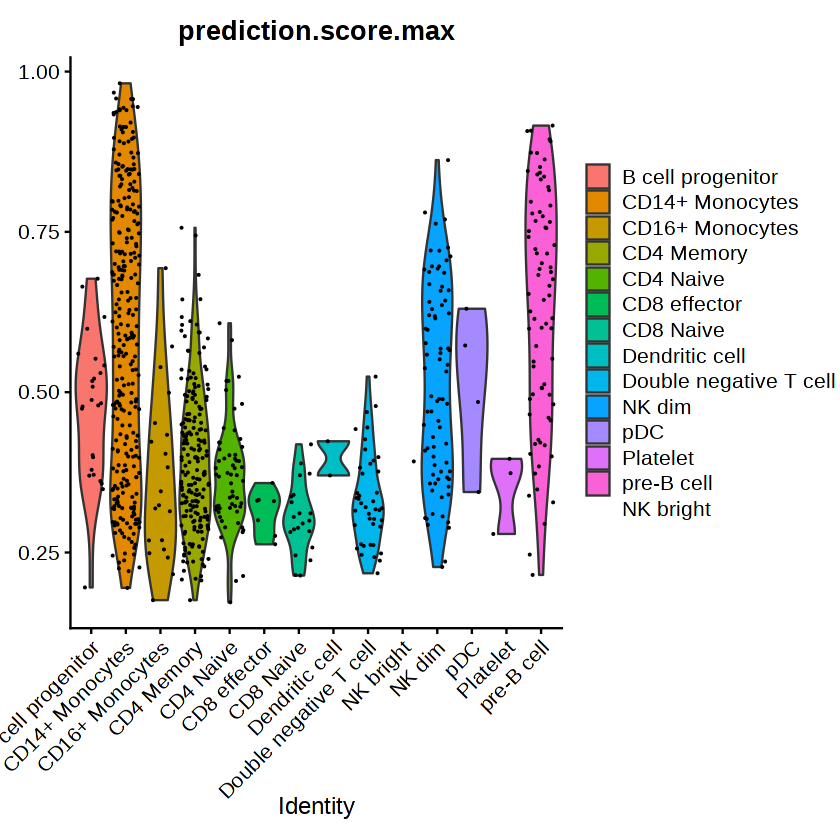

In [ ]:
VlnPlot(pbmc, 'prediction.score.max', group.by = 'predicted.id')

Plotting the prediction score for the cells assigned to each label reveals that the “platelet” cells received relatively low scores (< 0.8), indicating a low confidence in the assigned cell identity. In most cases, the next most likely cell identity predicted for these cells was “CD4 naive”.

In [ ]:
# Identify the metadata columns that start with "prediction.score."
metadata_attributes <- colnames(pbmc[[]])
prediction_score_attributes <- grep("^prediction.score.", metadata_attributes, value = TRUE)
prediction_score_attributes <- setdiff(prediction_score_attributes, "prediction.score.max")

# Extract the prediction score attributes for these cells
predicted_platelets <- which(pbmc$predicted.id == "Platelet")
platelet_scores <- pbmc[[]][predicted_platelets, prediction_score_attributes]

# Order the columns by their average values in descending order
ordered_columns <- names(sort(colMeans(platelet_scores, na.rm = TRUE), decreasing = TRUE))
ordered_platelet_scores_df <- platelet_scores[, ordered_columns]

head(ordered_platelet_scores_df)[3]

,prediction.score.NK.dim
,<dbl>
CCGTACTCATTGCACA-1,0.0000000
TAAGTGCGTTCCCGGA-1,0.0000000
TGATGCATCCCTACGT-1,0.2616291


As there are only a very small number of cells classified as “platelets” (< 20), it is difficult to figure out their precise cellular identity. Larger datasets would be required to confidently identify specific peaks for this population of cells, and further analysis performed to correctly annotate them. For downstream analysis we will thus remove the extremely rare cell states that were predicted, retaining only cell annotations with >20 cells total.

In [ ]:
predicted_id_counts <- table(pbmc$predicted.id)

# Identify the predicted.id values that have more than 20 cells
major_predicted_ids <- names(predicted_id_counts[predicted_id_counts > 20])
pbmc <- pbmc[, pbmc$predicted.id %in% major_predicted_ids]

In [ ]:
table(pbmc$predicted.id)


     B cell progenitor        CD14+ Monocytes             CD4 Memory 
                    25                    294                    204 
             CD4 Naive              CD8 Naive Double negative T cell 
                    60                     21                     42 
                NK dim             pre-B cell 
                    78                     76 

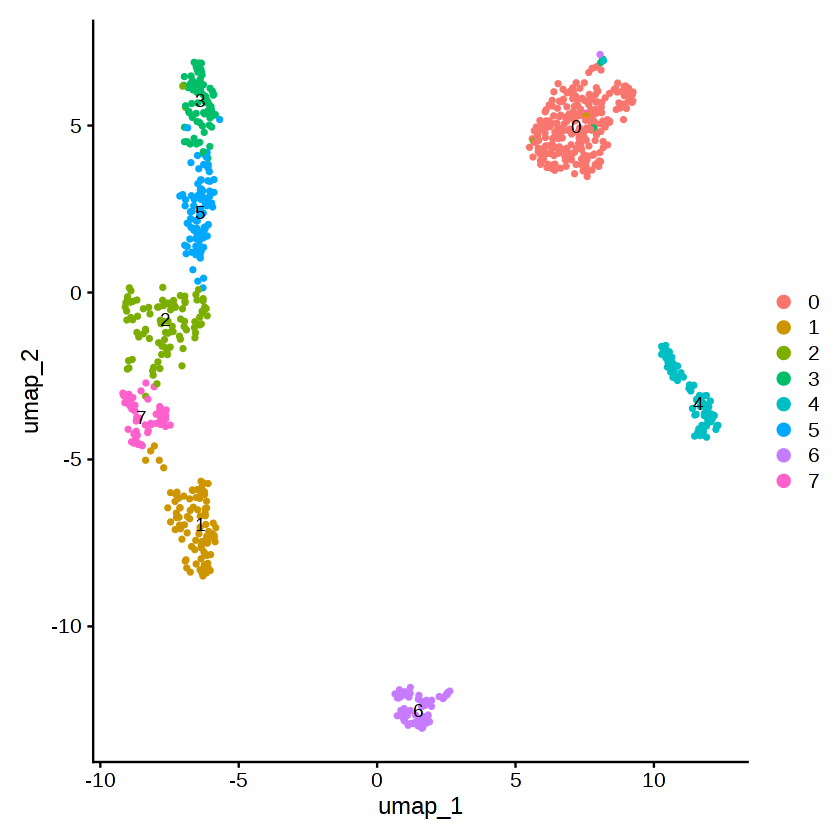

In [ ]:
DimPlot(pbmc, label = T)

## Find DA peaks

To find differentially accessible regions between clusters of cells, we can perform a differential accessibility (DA) test. A simple approach is to perform a Wilcoxon rank sum test, and the presto package has implemented an extremely fast Wilcoxon test that can be run on a Seurat object.

In [ ]:
Idents(pbmc) <- pbmc$predicted.id

In [ ]:
DefaultAssay(pbmc) <- "ATAC"

In [ ]:
da_peaks <- FindMarkers(
  object = pbmc,
  ident.1 = "CD14+ Monocytes",
  ident.2 = "pre-B cell",
  test.use = 'wilcox',
  min.pct = 0.1
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr16-88102897-88103616,8.348436e-47,-13.476528,0.000,0.618,4.027286e-42
chr2-232536349-232537719,8.584100e-46,-8.431986,0.003,0.618,4.140970e-41
chr6-167526302-167528389,3.084050e-41,-4.671659,0.037,0.671,1.487746e-36
chr22-42332096-42332729,2.939148e-40,-7.558762,0.003,0.553,1.417845e-35
chr9-37408955-37409744,1.035409e-38,-5.427037,0.020,0.592,4.994814e-34
chr3-13152023-13152852,2.405179e-38,-5.426403,0.017,0.579,1.160258e-33


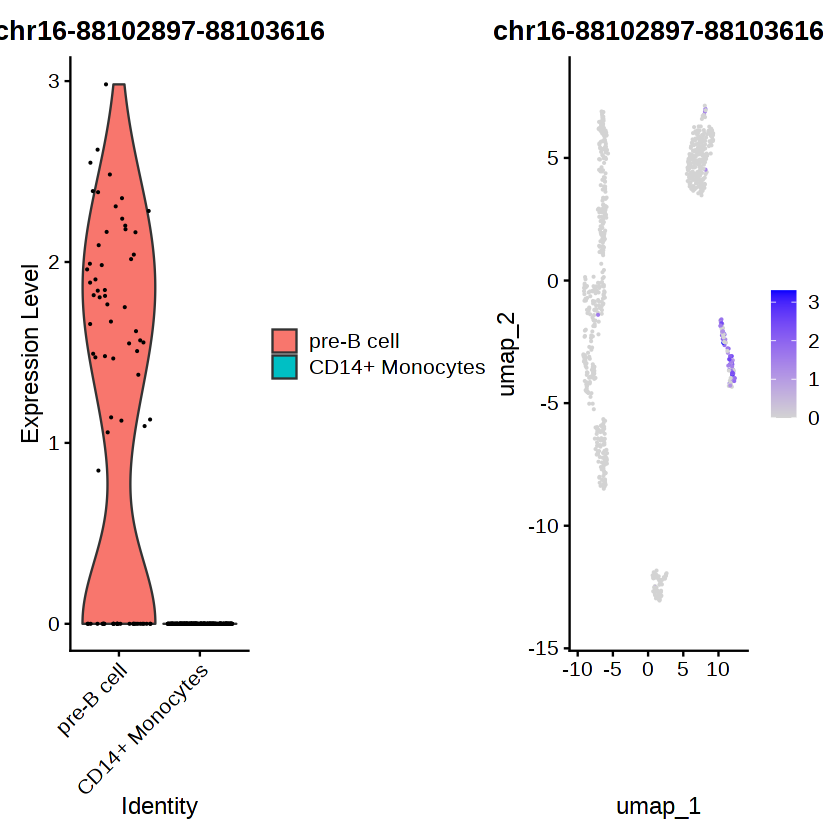

In [ ]:
plot1 <- VlnPlot(
  object = pbmc,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("CD14+ Monocytes","pre-B cell")
)
plot2 <- FeaturePlot(
  object = pbmc,
  features = rownames(da_peaks)[1],
  pt.size = 0.1
)

plot1 | plot2

In [ ]:
open_CD14_mono <- rownames(da_peaks[da_peaks$avg_log2FC > 3, ])
open_preB <- rownames(da_peaks[da_peaks$avg_log2FC < -3, ])

closest_genes_CD14mono<- ClosestFeature(pbmc, regions = open_CD14_mono)
closest_genes_preB <- ClosestFeature(pbmc, regions = open_preB)

In [ ]:
head(closest_genes_CD14mono)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENST00000336600,ENST00000336600,C6orf223,ENSG00000181577,protein_coding,utr,chr6-44003127-44005958,chr6-44026088-44027309,20129
ENSE00001610710,ENST00000436295,RP11-497D6.3,ENSG00000227748,lincRNA,exon,chr6-146862766-146863081,chr6-146864371-146865190,1289
ENSE00002497666,ENST00000425520,FRG2B,ENSG00000225899,protein_coding,exon,chr10-133626565-133626795,chr10-134822569-134823486,1195773
ENST00000300589,ENST00000300589,NOD2,ENSG00000167207,protein_coding,cds,chr16-50729818-50729901,chr16-50729491-50731093,0
ENST00000557172,ENST00000557172,KLC1,ENSG00000126214,protein_coding,gap,chr14-103561985-103654563,chr14-103585206-103585883,0
ENST00000574955,ENST00000574955,INPP5K,ENSG00000132376,protein_coding,utr,chr17-1510421-1510513,chr17-1510408-1511260,0


In [ ]:
head(closest_genes_preB)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENSE00002612902,ENST00000566351,RP11-863P13.4,ENSG00000205037,lincRNA,exon,chr16-88100694-88100985,chr16-88102897-88103616,1911
ENST00000543200,ENST00000543200,CHRND,ENSG00000135902,protein_coding,utr,chr2-232535313-232536665,chr2-232536349-232537719,0
ENSE00003705750,ENST00000609107,RP11-351J23.2,ENSG00000272549,lincRNA,exon,chr6-167666840-167670909,chr6-167526302-167528389,138450
ENST00000515426,ENST00000515426,TCF20,ENSG00000100207,protein_coding,gap,chr22-42215342-42343478,chr22-42332096-42332729,0
ENSE00001934486,ENST00000318158,GRHPR,ENSG00000137106,protein_coding,exon,chr9-37422666-37422833,chr9-37408955-37409744,12921
ENSE00003737071,ENST00000613206,IQSEC1,ENSG00000144711,protein_coding,exon,chr3-13072992-13073117,chr3-13152023-13152852,78905


We could follow up with this result by doing gene ontology enrichment analysis on the gene sets returned by ClosestFeature(),and there are many R packages that can do this (see theGOstats or clusterProfiler packages for example).

## GO Enrichment

In [ ]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)

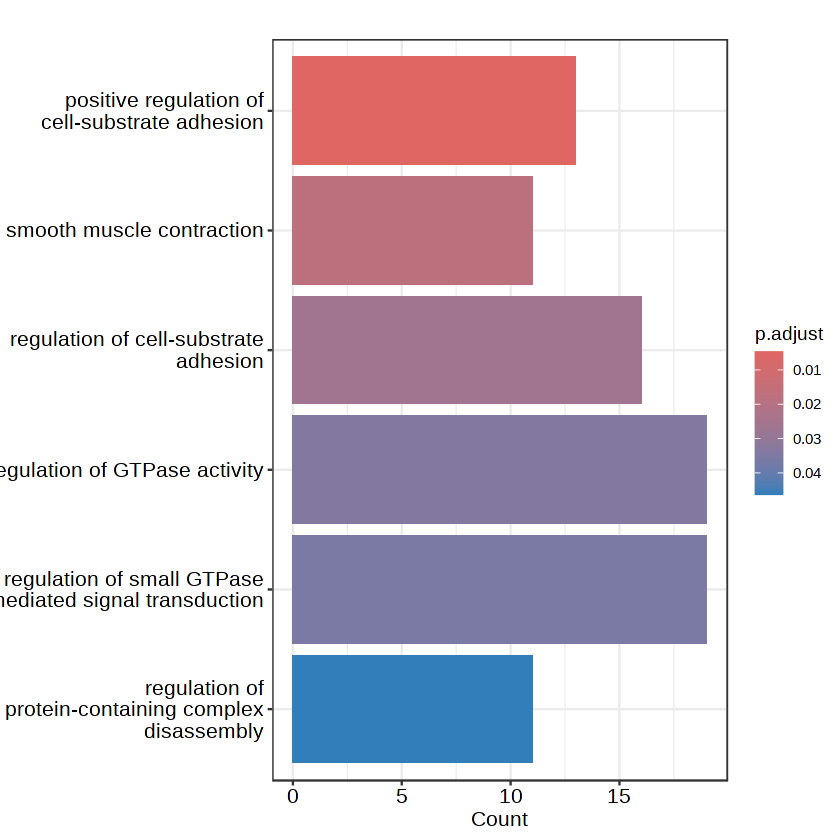

In [ ]:
CD14mono_dim_ego <- enrichGO(gene = closest_genes_CD14mono$gene_id,
                keyType = "ENSEMBL",
                OrgDb = org.Hs.eg.db,
                ont = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05,
                readable = TRUE)

barplot(CD14mono_dim_ego,showCategory = 20)

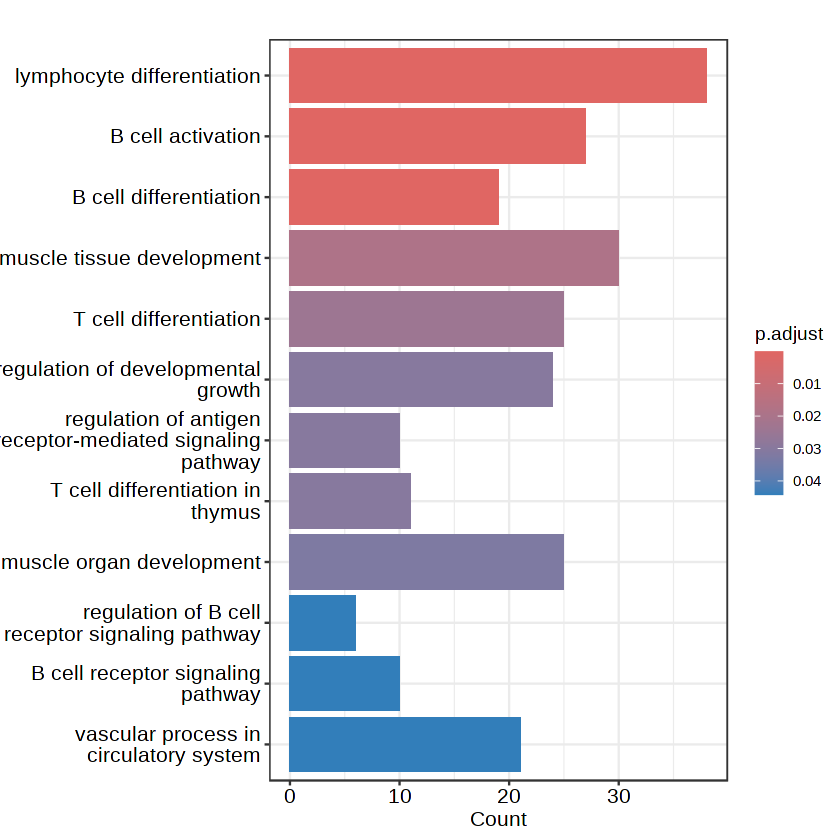

In [ ]:
preB_ego <- enrichGO(gene = closest_genes_preB$gene_id,
                keyType = "ENSEMBL",
                OrgDb = org.Hs.eg.db,
                ont = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05,
                readable = TRUE)

barplot(preB_ego,showCategory = 20)

## Plotting genomic regions
We can plot the frequency of Tn5 integration across regions of the genome for cells grouped by cluster, cell type, or any other metadata stored in the object for any genomic region using the CoveragePlot() function. These represent pseudo-bulk accessibility tracks, where signal from all cells within a group have been averaged together to visualize the DNA accessibility in a region. Alongside these accessibility tracks we can visualize other important information including gene annotation, peak coordinates, and genomic links (if they’re stored in the object).

For plotting purposes, it’s nice to have related cell types grouped together. We can automatically sort the plotting order according to similarities across the annotated cell types by running the SortIdents() function:

In [ ]:
pbmc <- SortIdents(pbmc)

Creating pseudobulk profiles for 8 variables across 48240 features

Computing euclidean distance between pseudobulk profiles

Clustering distance matrix



We can then visualize the DA peaks open in Nk dim cells and CD14 monocytes, near some key marker genes for these cell types.

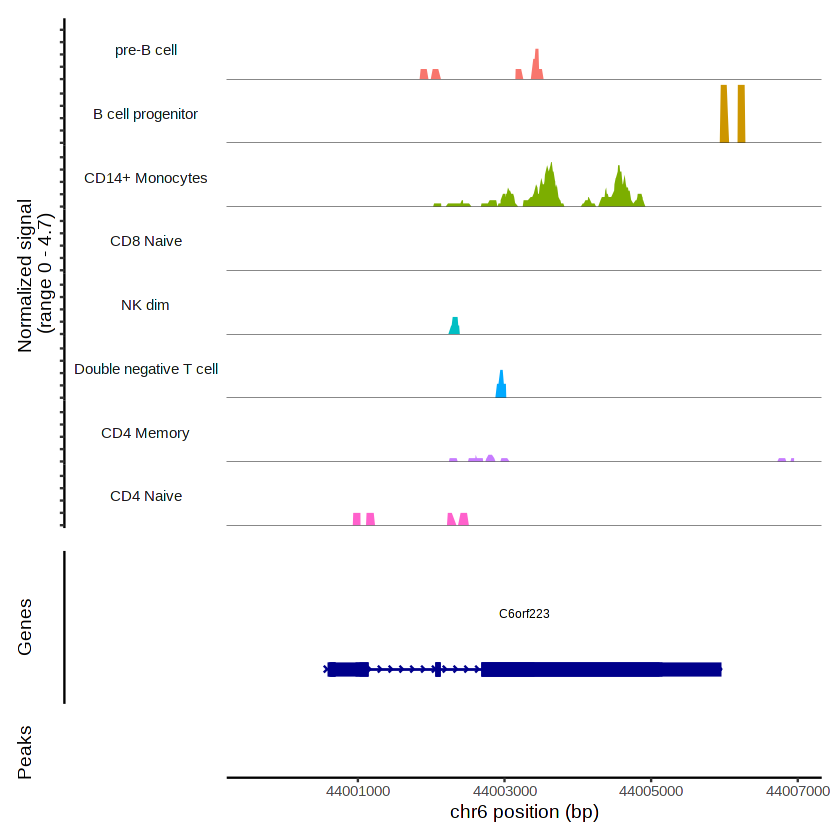

In [ ]:
# find DA peaks overlapping gene of interest
regions_highlight <- subsetByOverlaps(StringToGRanges(open_CD14_mono), LookupGeneCoords(pbmc, "C6orf223"))

CoveragePlot(
  object = pbmc,
  region = "C6orf223",
  region.highlight = regions_highlight,
  extend.upstream = 1000,
  extend.downstream = 1000
)

Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`)."


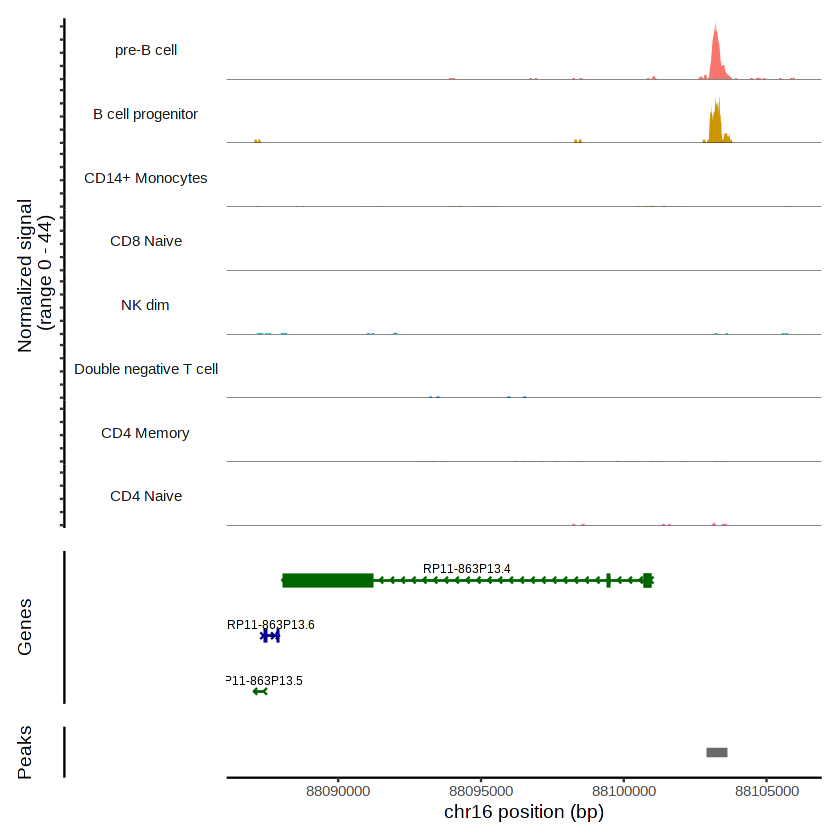

In [ ]:
regions_highlight <- subsetByOverlaps(StringToGRanges(open_preB), LookupGeneCoords(pbmc, "RP11-863P13.4"))

CoveragePlot(
  object = pbmc,
  region = "RP11-863P13.4",
  region.highlight = regions_highlight,
  extend.upstream = 1000, #10000
  extend.downstream = 5000 #20000
)

In [ ]:
save(da_peaks, file = "da_peaks.RData")
save(pbmc, file = "pbmc_final.RData")

We can observe a clear focused